In [804]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [805]:
%matplotlib inline

# Data Questions

1) As you request more RAM, how does that impact your queue time?

2) As you request more wall time, how does that impact your queue time?

3) Are there nodes that fail more often than others?
** ignore cases where multiple nodes are used

4) Are there users who are clogging up the flow by running too many small jobs? Greater than 500 jobs, each less than 5 minutes, within 4 hours

accre = pd.read_fwf('')

In [806]:
accre = pd.read_table('data/july-2017-thru-june-2018.txt', sep = "|", dtype=str)

In [807]:
accre.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [808]:
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [809]:
accre.shape

(12499389, 25)

### 1) As you request more RAM, how does that impact your queue time?

In [810]:
### Random sample with numpy
indices = np.random.randint(0,len(accre),5000)
accre_subset = accre.iloc[indices]

In [828]:
accre_subset.head(100)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
3651939,19428650_7957,19480713,accre,production,beam_lab,beam_lab,59350,tierneje,237813,2017-10-02T21:54:58,...,COMPLETED,1,1,1,8Gn,NaN,"cpu=1,mem=8G,node=1",08:00:00,vmp316,simulatePWChannelData_Angles.slurm
8223950,24051321_497,24052885,accre,production,p_meiler,p_meiler,10023,brownbp1,353986,2018-01-25T22:44:55,...,COMPLETED,1,1,1,4Gc,NaN,"cpu=1,mem=4G,node=1",01:00:00,vmp486,semiflex_align_cdk2
3661537,19490311,19490311,accre,production,cms,cms,31000,cmsglidein,NaN,2017-10-04T01:14:27,...,CANCELLED by 29607,1,1,1,5000Mn,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,None assigned,bl_f0efb91a50e0
6013429,21841166_56,21842624,accre,production,h_biostat_student,h_biostat_student,59331,schluedj,169859,2017-11-27T04:05:43,...,COMPLETED,1,1,1,10Gn,NaN,"cpu=1,mem=10G,node=1",00:45:00,vmp1343,MAP_Spline_MV_pymc31_sampsize150000_knots18_rr...
162171,15980513,15980513,accre,production,math,math,59422,zhangdk,342713,2017-07-10T08:24:21,...,CANCELLED by 342713,1,1,1,1024Mn,NaN,"cpu=1,mem=1024M,node=1",02:00:00,None assigned,pcreo
8023667,23852602,23852602,accre,production,cms_stage2,cms_stage1,59298,autocms,9209,2018-01-21T21:21:05,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1008,skim_test
386309,16187756_77,16204651,accre,production,math,math,59422,zhangdk,342713,2017-07-13T18:46:11,...,COMPLETED,1,1,1,1024Mn,NaN,"cpu=1,mem=1024M,node=1",00:30:00,vmp1015,PCreo_Sphere
11393653,27222375,27222375,accre,production,cms_stage2,cms_stage1,59298,autocms,9209,2018-05-09T05:05:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1007,skim_test
7664264,23492274_35,23493181,accre,production,anderson_mri,anderson_mri,59224,gaoy3,93631,2018-01-12T18:21:33,...,COMPLETED,1,1,1,16Gn,NaN,"cpu=1,mem=16G,node=1",01:00:00,vmp203,job_array.slurm
78920,15896334,15896334,accre,production,cms,cms,31000,cmsglidein,NaN,2017-07-06T18:11:01,...,COMPLETED,1,1,1,5000Mn,NaN,"cpu=1,mem=5000M,node=1",2-00:00:00,vmp361,bl_9cc8dd993bbd


In [812]:
accre_q1 = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Eligible', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'])
accre_q1.head()

,JobID,Submit,Start
3651939,19428650_7957,2017-10-02T21:54:58,2017-10-03T20:46:37
8223950,24051321_497,2018-01-25T22:44:55,2018-01-25T23:16:11
3661537,19490311,2017-10-04T01:14:27,2017-10-04T02:14:51
6013429,21841166_56,2017-11-27T04:05:43,2017-11-27T04:48:08
162171,15980513,2017-07-10T08:24:21,2017-07-10T18:42:39


In [813]:
from datetime import datetime 

In [814]:
start = pd.to_datetime(accre_q1['Start'])
submit = pd.to_datetime(accre_q1['Submit'])

In [815]:
accre_q1['qtime'] = start-submit
accre_q1.tail()

,JobID,Submit,Start,qtime
9573530,25402451,2018-03-04T14:50:21,2018-03-04T15:25:26,00:35:05
5009359,20838144,2017-11-06T15:47:50,2017-11-06T22:24:20,06:36:30
2575353,18239020_16,2017-09-15T03:27:22,2017-09-15T14:23:16,10:55:54
4899909,20728694,2017-11-04T04:27:44,2017-11-04T05:28:03,01:00:19
8855321,24684235,2018-02-12T07:43:10,2018-02-12T08:42:26,00:59:16


In [816]:
accre_q1['hour']=accre_q1.qtime.dt.total_seconds()/60/60
##(df['col'].dt.total_seconds())
accre_q1.tail(5)

,JobID,Submit,Start,qtime,hour
9573530,25402451,2018-03-04T14:50:21,2018-03-04T15:25:26,00:35:05,0.584722
5009359,20838144,2017-11-06T15:47:50,2017-11-06T22:24:20,06:36:30,6.608333
2575353,18239020_16,2017-09-15T03:27:22,2017-09-15T14:23:16,10:55:54,10.931667
4899909,20728694,2017-11-04T04:27:44,2017-11-04T05:28:03,01:00:19,1.005278
8855321,24684235,2018-02-12T07:43:10,2018-02-12T08:42:26,00:59:16,0.987778


In [817]:
qtime=accre_q1.drop(labels=['Submit', 'Start', 'qtime', 'col'], axis=1)
qtime.head()

KeyError: "labels ['col'] not contained in axis"

In [ ]:
### Craeting data frame of RAM Requested
ramreq = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Eligible', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName','JobID', 'Submit', 'Start'])
ramreq.head()
ramreq.info()


In [ ]:
ramreq.head()

In [ ]:
ramreq['col1'] = ramreq['ReqMem'].str[-2:]
ramreq['col2'] = ramreq['ReqMem'].str[:-2]
ramreq.head()

In [ ]:
## Did not work
##mapping = {'Mn': 1, 'Mc': 1, 'Gc' : 1024, 'Gn': 1024}

##ramreq.replace({'Mn': mapping, 'Mc': mapping,'Gc': mapping, 'Gn': mapping })

In [ ]:
## Did not work
##ramreq['col3'] = ramreq.apply(lambda row: (row['col1']*row['col2']), axis = 1)

In [ ]:
## This is working too:
mymap = {'Mn': 0.001, 'Mc': 0.001, 'Gc' : 1, 'Gn': 1, '0n':0}

ramreq_1=ramreq.applymap(lambda s: mymap.get(s) if s in mymap else s)
ramreq_1.head()

##print(ramreq_1.loc[[6977652]])

In [ ]:
ramreq_1['col1_nm'] = pd.to_numeric(ramreq_1['col1'])
ramreq_1['col2_nm'] = pd.to_numeric(ramreq_1['col2'])
ramreq_1.info()

In [ ]:
ramreq_1['Memory']= ramreq_1.col1_nm*ramreq_1.col2_nm
ramreq_1.head()

##print(ramreq_2.loc[[11192342]])


In [ ]:
ramreq_1.describe()

In [ ]:
ramreq_1.head()

In [ ]:
##ramreq=ramreq.astype(float)
##ramreq_1=pd.to_numeric(ramreq_1['col3'])
##ramreq_1.col3.plot()
##plt.show()

In [ ]:

ramreq.head()

In [ ]:
qtime.shape

In [ ]:
ramreq_1.shape

In [ ]:
#qtime.merge(ramreq_1['Memory']) 
qtime_ramreq = pd.concat((qtime, ramreq_1), axis=1)

qtime_ramreq.head()

In [ ]:
qtime_ramreq.plot(kind='hist', x='Memory', y='hour', bins=50, color='green')
plt.xlim((0,100))
plt.ylim((0,200))
plt.grid('off')
plt.xlabel("RAM Requested \n (Gigabytes)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q1: RAM requested vs Queue Time");


In [ ]:
qtime_ramreq.plot(kind='scatter', x='Memory', y='hour', color='green')
plt.xlim((0, 150))
plt.ylim((0,150))
plt.grid('off')
plt.xlabel("RAM Requested \n (Gigabytes)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q1: RAM requested vs Queue Time");

In [849]:
data = qtime_ramreq[['Memory','hour']]
correlation = data.corr(method='pearson')
print(correlation)

          Memory      hour
Memory  1.000000  0.019134
hour    0.019134  1.000000


## 2) As you request more wall time, how does that impact your queue time?

In [ ]:
accre_q2 = accre_subset.drop(columns=['JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'NodeList', 'JobName'])

accre_q2.head()

In [ ]:
accre_q2['H:M:S'] = accre_q2.Timelimit.str[-8:]
accre_q2['days-'] = accre_q2.Timelimit.str[:-8]
accre_q2['days'] = accre_q2['days-'].str[:-1]

In [ ]:
accre_q2.head()

In [ ]:
accre_q2['days']= pd.to_numeric(accre_q2['days'])

In [ ]:
accre_q2.dtypes

In [ ]:
accre_q2['d2hours']= accre_q2['days']*24
accre_q2.head(1)

In [ ]:
accre_q2 = accre_q2.fillna(0)
accre_q2.head()

In [ ]:
accre_q2['seconds'] = accre_q2.Timelimit.str[-2:]
accre_q2['minutes'] = accre_q2.Timelimit.str[-5:-3]
accre_q2['hours'] = accre_q2.Timelimit.str[-8:-6]
accre_q2.head()

In [ ]:
accre_q2['seconds']= pd.to_numeric(accre_q2['seconds'])
accre_q2['minutes']= pd.to_numeric(accre_q2['minutes'])
accre_q2['hours']= pd.to_numeric(accre_q2['hours'])
accre_q2['d2hours']= pd.to_numeric(accre_q2['d2hours'])

In [ ]:
## regular expression did not work!

#import re
#accre_q2['Timelimit_days']=accre_q2.Timelimit.str.extract('(\d+)-')
#accre_q2['Timelimit_hours']=accre_q2.Timelimit.str.extract('(\d+:\d+:\d+)')
#accre_q2.head()


In [818]:
accre_q2['seconds']= (accre_q2['seconds'] /60) /60
accre_q2['minutes']= (accre_q2['minutes'] /60)
##total_seconds()/60/60

accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours,seconds,minutes,hours,total_hours
5588186,21353828_2436,14-00:00:00,00:00:00,14-,14.0,336.0,0.0,0.0,0.0,336.0
7413207,23240262_190,20:00:00,20:00:00,,0.0,0.0,0.0,0.0,20.0,20.0
63985,15881399,12:00:00,12:00:00,,0.0,0.0,0.0,0.0,12.0,12.0
8908120,24737034,2-00:00:00,00:00:00,2-,2.0,48.0,0.0,0.0,0.0,48.0
5265956,21092010_672,02:00:00,02:00:00,,0.0,0.0,0.0,0.0,2.0,2.0


In [819]:
accre_q2['total_hours'] = accre_q2['d2hours'] + accre_q2['hours']
accre_q2['minutes'] + accre_q2['seconds']
accre_q2.head()

,JobID,Timelimit,H:M:S,days-,days,d2hours,seconds,minutes,hours,total_hours
5588186,21353828_2436,14-00:00:00,00:00:00,14-,14.0,336.0,0.0,0.0,0.0,336.0
7413207,23240262_190,20:00:00,20:00:00,,0.0,0.0,0.0,0.0,20.0,20.0
63985,15881399,12:00:00,12:00:00,,0.0,0.0,0.0,0.0,12.0,12.0
8908120,24737034,2-00:00:00,00:00:00,2-,2.0,48.0,0.0,0.0,0.0,48.0
5265956,21092010_672,02:00:00,02:00:00,,0.0,0.0,0.0,0.0,2.0,2.0


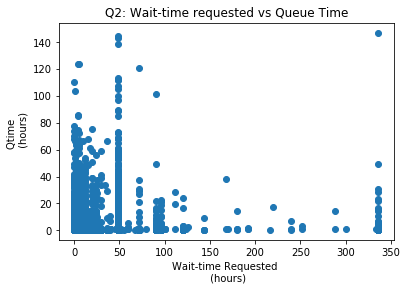

In [820]:
plt.scatter(y=qtime_ramreq['hour'], x=accre_q2['total_hours'])
plt.xlabel("Wait-time Requested \n (hours)")
plt.ylabel("Qtime \n (hours)")
plt.title("Q2: Wait-time requested vs Queue Time");
plt.show()

## Question 3: Are there nodes that fail more often than others? ** ignore cases where multiple nodes are used?


In [832]:
accre_q3 = accre.drop(columns=['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'JobName'])
accre_q3.head()

,State,NodeList
0,COMPLETED,vmp1085
1,COMPLETED,vmp1099
2,COMPLETED,vmp1126
3,COMPLETED,vmp230
4,COMPLETED,vmp1242


In [833]:
accre_nodefail = accre_q3.loc[accre_q3['State'] == 'NODE_FAIL']
accre_nodefail.head(10)

,State,NodeList
22163,NODE_FAIL,vmp1342
22166,NODE_FAIL,vmp1055
22167,NODE_FAIL,vmp1043
22204,NODE_FAIL,vmp1342
22205,NODE_FAIL,vmp1342
22206,NODE_FAIL,vmp1342
22207,NODE_FAIL,vmp1342
22208,NODE_FAIL,vmp1342
22209,NODE_FAIL,vmp1342
22210,NODE_FAIL,vmp1342


In [845]:
most_frequent_nodeFail = accre_nodefail["NodeList"].value_counts(sort=True);
most_frequent_nodeFail.head(20)


vmp1354    31
vmp1350    24
vmp1352    22
vmp1347    18
vmp1349    17
vmp1339    16
vmp1374    16
vmp1342    14
vmp1351    14
vmp425     13
vmp1333    11
vmp1331    11
vmp1223    11
vmp211     11
vmp1343    11
vmp205     11
vmp301     11
vmp1340    10
vmp210     10
vmp204     10
Name: NodeList, dtype: int64

In [848]:
writer = pd.ExcelWriter('mostfrequentnodefailed.xlsx')
most_frequent_nodeFail.to_excel(writer, 'sheet1')
writer.save()

## 4) Are there users who are clogging up the flow by running too many small jobs? Greater than 500 jobs, each less than 5 minutes, within 4 hours

In [854]:
accre_q4 = accre.drop(columns=['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
                               'UID', 'Eligible', 'Elapsed',
       'ExitCode', 'NNodes', 'NCPUS', 'ReqCPUS', 'State', 'NodeList', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'JobName'])
accre_q4.head()

,User,Submit,Start,End
0,masispider,2017-07-02T00:40:58,2017-07-03T02:13:59,2017-07-04T03:19:20
1,masispider,2017-07-02T00:40:58,2017-07-03T02:20:08,2017-07-04T02:11:55
2,masispider,2017-07-02T00:40:58,2017-07-03T02:41:13,2017-07-04T04:41:04
3,masispider,2017-07-02T00:40:58,2017-07-03T02:51:53,2017-07-04T10:54:13
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11


In [862]:
accre_q4['Jobsize'] = pd.to_datetime(accre_q4['End']) - pd.to_datetime(accre_q4['Start'])
accre_q4.head()

,User,Submit,Start,End,Jobsize
0,masispider,2017-07-02T00:40:58,2017-07-03T02:13:59,2017-07-04T03:19:20,1 days 01:05:21
1,masispider,2017-07-02T00:40:58,2017-07-03T02:20:08,2017-07-04T02:11:55,0 days 23:51:47
2,masispider,2017-07-02T00:40:58,2017-07-03T02:41:13,2017-07-04T04:41:04,1 days 01:59:51
3,masispider,2017-07-02T00:40:58,2017-07-03T02:51:53,2017-07-04T10:54:13,1 days 08:02:20
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,0 days 00:00:10


In [940]:
accre_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 5 columns):
User       object
Submit     object
Start      object
End        object
Jobsize    timedelta64[ns]
dtypes: object(4), timedelta64[ns](1)
memory usage: 476.8+ MB


In [954]:
#accre_q4.query('Jobsize == "0 days 00:05:00"')

accre_5min = accre_q4[accre_q4['Jobsize'] < "0 days 00:05:00"]
accre_5min.head(10)

,User,Submit,Start,End,Jobsize
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,00:00:10
5,autocms,2017-07-01T05:00:01,2017-07-01T05:00:04,2017-07-01T05:03:22,00:03:18
6,tuos,2017-07-01T05:00:02,2017-07-01T05:00:04,2017-07-01T05:02:07,00:02:03
7,uscms010,2017-07-01T05:00:22,2017-07-01T05:00:23,2017-07-01T05:00:33,00:00:10
8,autocms,2017-07-01T05:01:01,2017-07-01T05:01:02,2017-07-01T05:05:49,00:04:47
9,tuos,2017-07-01T05:01:02,2017-07-01T05:01:05,2017-07-01T05:04:17,00:03:12
31,vuiiscci,2017-07-01T05:01:26,2017-07-01T13:51:49,2017-07-01T13:51:49,00:00:00
33,vuiiscci,2017-07-01T05:01:26,2017-07-01T14:03:05,2017-07-01T14:03:05,00:00:00
34,uscms010,2017-07-01T05:01:56,2017-07-01T05:01:56,2017-07-01T05:03:56,00:02:00
35,autocms,2017-07-01T05:02:02,2017-07-01T05:02:02,2017-07-01T05:04:53,00:02:51


In [975]:
accre_5min.shape

(7708907, 5)

In [978]:
frequent_user = accre_5min["User"].value_counts(ascending=False);
frequent_user.head()

cmsglidein    3335001
sotocs         635622
autocms        424980
cmslocal       359112
uscms010       257928
Name: User, dtype: int64

In [979]:
group = accre_5min.groupby(by='Submit', axis=0)
group.head(5)

,User,Submit,Start,End,Jobsize
4,uscms010,2017-07-01T05:00:00,2017-07-01T05:00:01,2017-07-01T05:00:11,00:00:10
5,autocms,2017-07-01T05:00:01,2017-07-01T05:00:04,2017-07-01T05:03:22,00:03:18
6,tuos,2017-07-01T05:00:02,2017-07-01T05:00:04,2017-07-01T05:02:07,00:02:03
7,uscms010,2017-07-01T05:00:22,2017-07-01T05:00:23,2017-07-01T05:00:33,00:00:10
8,autocms,2017-07-01T05:01:01,2017-07-01T05:01:02,2017-07-01T05:05:49,00:04:47
9,tuos,2017-07-01T05:01:02,2017-07-01T05:01:05,2017-07-01T05:04:17,00:03:12
31,vuiiscci,2017-07-01T05:01:26,2017-07-01T13:51:49,2017-07-01T13:51:49,00:00:00
33,vuiiscci,2017-07-01T05:01:26,2017-07-01T14:03:05,2017-07-01T14:03:05,00:00:00
34,uscms010,2017-07-01T05:01:56,2017-07-01T05:01:56,2017-07-01T05:03:56,00:02:00
35,autocms,2017-07-01T05:02:02,2017-07-01T05:02:02,2017-07-01T05:04:53,00:02:51
